# Iris Dataset

## Using Neural Network

### Importing, Downloading & Visualizing

In [21]:
# Importing libraries

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Get the dataset

iris = load_iris()

In [4]:
X = iris.data
Y = iris.target

In [9]:
X # Columns: SepalLengthCm   SepalWidthCm   PetalLengthCm   PetalWidthCm
Y # Classes: iris-setosa   iris-versicolor   iris-virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
# Loading onto dataframe

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

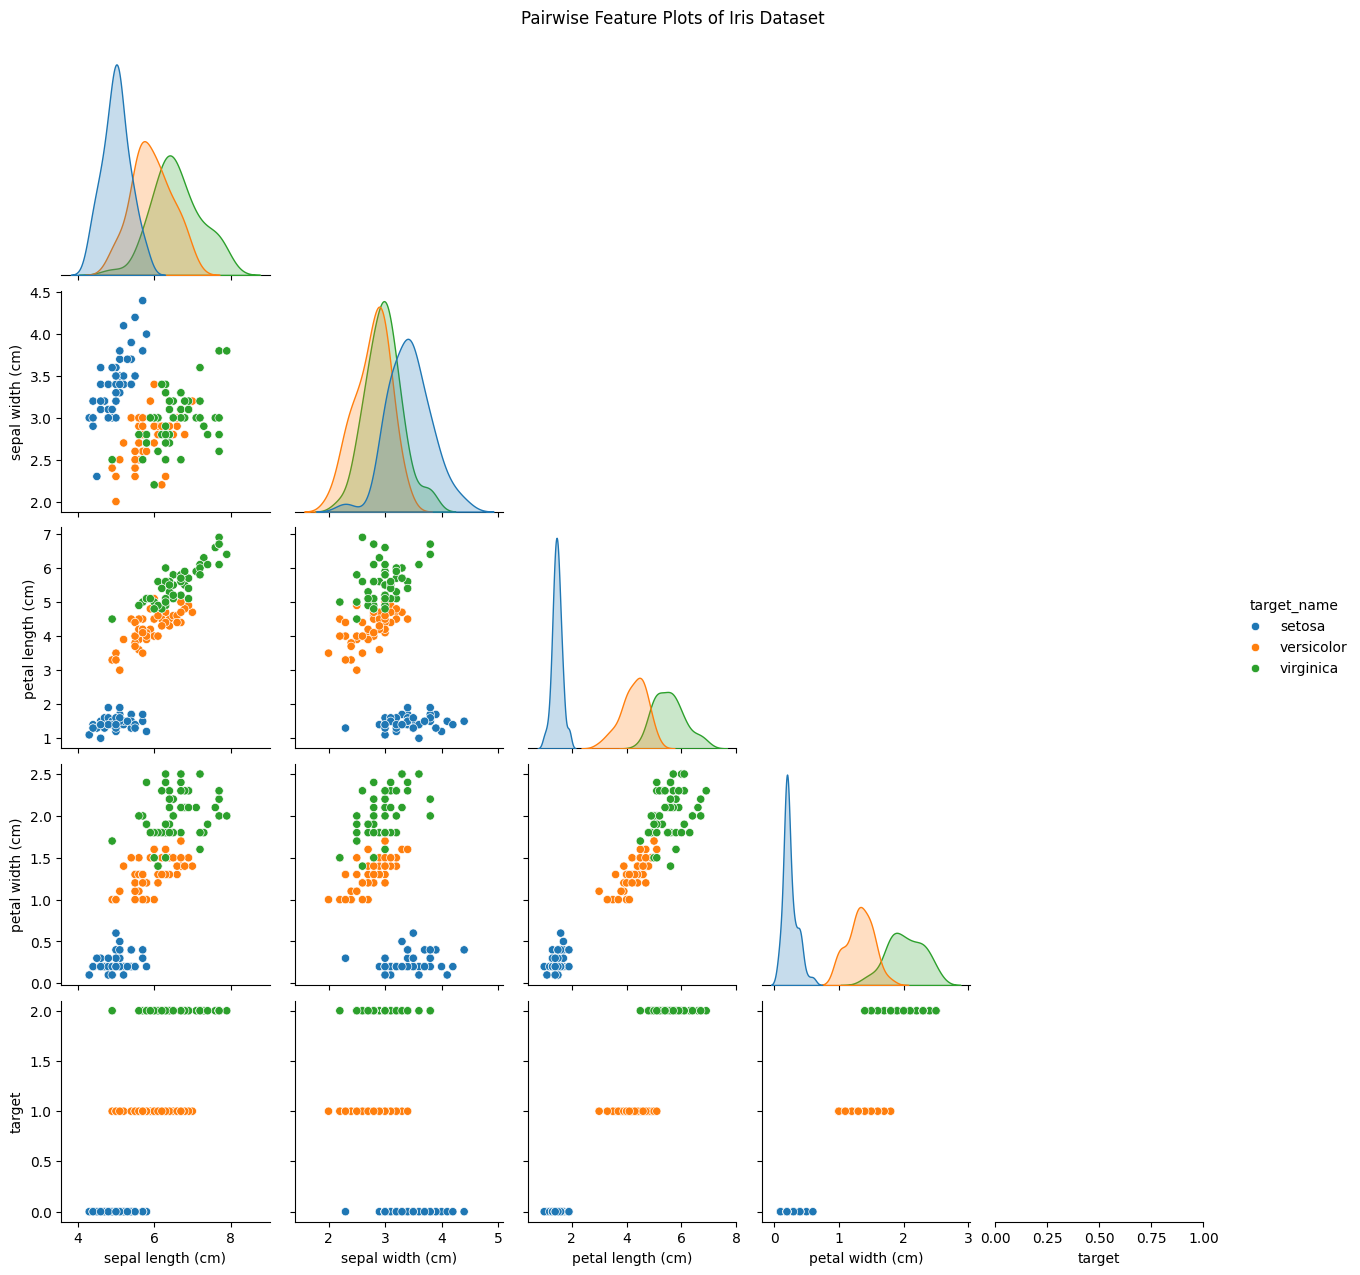

In [16]:
# Pairplot

sns.pairplot(df, hue='target_name', diag_kind='kde', corner=True)
plt.suptitle("Pairwise Feature Plots of Iris Dataset", y=1.02)
plt.show()

- Pairplot is a grid of scatter plots showing pairwise relationships between all combos of features in a dataset.
- It helps to
  - See which feature distinguishes a class compared to others.
  - Detect correlations between features.
  - Spot outliers or overlaps.
Here,
- From the KDE curves, Sepal features are less useful since more overlap is seen while the Petal features show a lot fo potential for classification.
- Setosa is easiest to classify(look at the petal KDE curves)

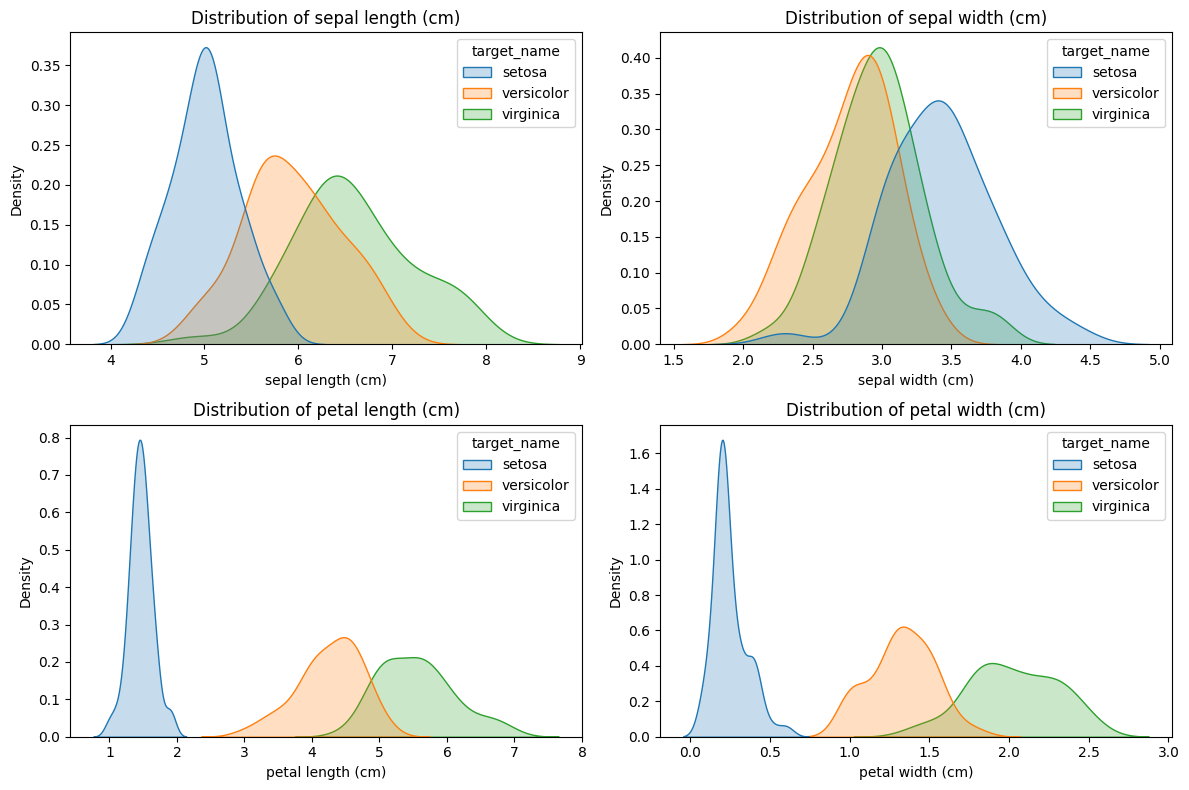

In [17]:
# Feature Distributions

plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data=df, x=feature, hue='target_name', fill=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

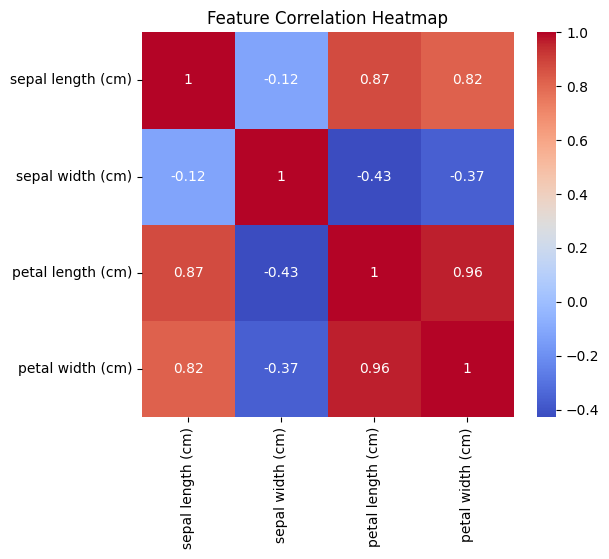

In [18]:
# Correlation Heatmap

plt.figure(figsize=(6, 5))
sns.heatmap(df[iris.feature_names].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

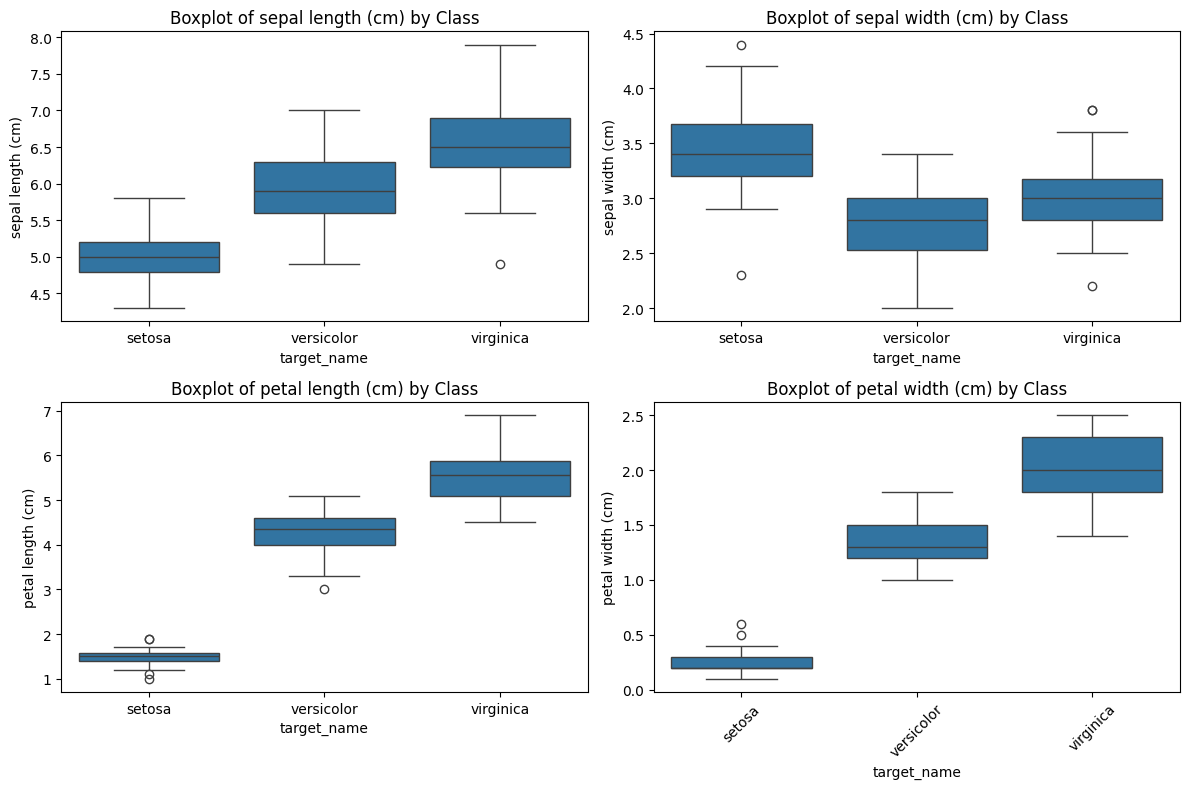

In [19]:
# Boxplots

plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='target_name', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [22]:
# Normalizing features

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
# Train & Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [24]:
X_train.shape

(120, 4)

In [25]:
X_test.shape

(30, 4)

## Building the Model

In [ ]:
# Model with keras tuner(Hyperparameter Tuning)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])